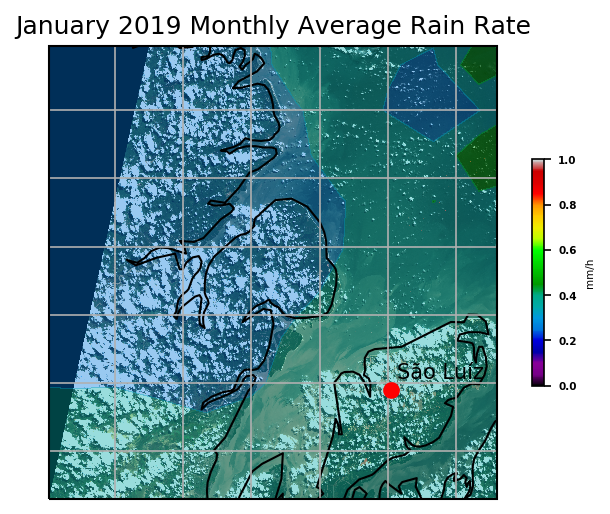

In [1]:
# %matplotlib notebook
# %matplotlib notebook

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5py
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from osgeo import gdal, osr

%matplotlib inline
%matplotlib inline

projection = ccrs.PlateCarree()

extent = [-44.996, -44.009, -2.805, -1.809]

fig = plt.figure(dpi=150)

ax = plt.axes(projection = projection)

ax.gridlines()
ax.add_feature(cfeature.STATES.with_scale('10m'))

ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.plot(-44.243317, -2.565823, 'bo', markersize=7, color='red', transform=ccrs.Geodetic())
ax.text(-44.23, -2.54, 'São Luíz', color='black', size=10, transform=ccrs.Geodetic())

plt.title('January 2019 Monthly Average Rain Rate')

font = {'weight' : 'bold', 'size' : 5}

plt.rc('font', **font)








fname = './resources/T23MNT_20190525T132241_TCI_60m.jp2'

img = plt.imread(fname)

ax.imshow(img, extent=extent, origin='upper', transform=ccrs.PlateCarree())

ax.set_extent(extent, crs=ccrs.PlateCarree())







hdf5 = '/notebooks/resources/3B-MO.MS.MRG.3IMERG.20190101-S000000-E235959.01.V06A.HDF5'
dataset = h5py.File(hdf5,'r')

precip = dataset['Grid/precipitation'][:]
precip = np.transpose(precip[0])

theLats = dataset['Grid/lat'][:]
theLons = dataset['Grid/lon'][:]






# clevs = np.arange(0,0.1,0.01)
clevs = np.arange(0,1.26,0.125)

x, y = np.float32(np.meshgrid(theLons, theLats))

masked_array = np.ma.masked_where(precip < 0,precip)

cmap = 'nipy_spectral'

cs = ax.contourf(x, y, precip, clevs, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.4)

ax.set_extent(extent, crs=ccrs.PlateCarree())

plt.xlim(-44.996, -44.009)
plt.ylim(-2.805, -1.809)

sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(0,1))
sm._A = []
plt.colorbar(sm, ax=ax, label='mm/h', shrink=0.5)

In [2]:
print(clevs)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25 ]
